# 20230915_Xenium_LR_analysis_NSCLC

## Load library

In [1]:
# import library
import pandas as pd
import numpy as np
import stlearn as st
import scanpy as sc
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [64]:
import gseapy as gp
import scanpy as sc

In [66]:
gp.__version__

'1.0.6'

In [192]:
gene_list = df_grid[df_grid >= 26.571707].loc["grid_1035"].dropna().index.tolist()
#gene_list_background = df_grid[df_grid <= 20].loc["grid_15557"].dropna().index.tolist()

In [162]:
import time
t1 = time.time()

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

t2 = time.time()
print(t2-t1)

5.484276056289673


In [210]:
# set background gene
pd.DataFrame(df_grid.columns).to_csv("/Volumes/Project/home/sakai/scRNA/20230518_Xenium/results/background_gene.txt", sep="\t", index=None, header=None)

In [193]:
import time
t1 = time.time()

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2021'],
                 #organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                 background="./background_gene.txt"
                )

t2 = time.time()
print(t2-t1)

5.504986763000488


In [ ]:
# threshold top5% of all transcript
top_five_per = pd.DataFrame(df_grid.stack()).reset_index()[0].sort_values(ascending=False).head(int(3394800 * 5/100)).values[-1]

# significant gene
sig_gene_list = df_grid[df_grid >= top_five_per].loc["grid_1035"].dropna().index.tolist()

In [206]:
import time
t1 = time.time()

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=sig_gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2021'],
                 #organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                 background="./background_gene.txt"
                )

t2 = time.time()
print(t2-t1)

4.44595193862915


In [57]:
# output directory
os.mkdir("deg_for_go")
os.mkdir("go_res")

一回につき4秒
10000スポットは11時間かかる

2秒間隔で並列処理

## Case12

In [236]:
# threshold top5% of all transcript
top_five_per = pd.DataFrame(df_grid.stack()).reset_index()[0].sort_values(ascending=False).head(int(3394800 * 5/100)).values[-1]

t1 = time.time()

for i in df_grid.index:
    # significant gene
    sig_gene_list = df_grid[df_grid >= top_five_per].loc[i].dropna().index.tolist()


    if len(gene_list) == 0:
        continue

    else:
        sig_gene_list = ";".join(sig_gene_list)
        # run
        subprocess.Popen([
            "python", 
            os.path.join("/Volumes/Project/home/sakai/scRNA/scripts", "20230920_xenium_to_go.py"), 
            sig_gene_list, 
            i
        ])

        # 0.5秒まつ
        time.sleep(0.5)
        
t2 = time.time()
print(t2-t1)

2023-09-20 21:08:46,462 [ERROR] Error fetching enrichment results: GO_Biological_Process_2021
Traceback (most recent call last):
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/site-packages/requests/models.py", line 971, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Volumes/Project/home/sakai/scRNA/scripts/20230920_xenium_to_go.py", lin

6424.6329889297485


2023-09-20 22:54:15,887 [ERROR] Error fetching enrichment results: GO_Biological_Process_2021
Traceback (most recent call last):
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/site-packages/requests/models.py", line 971, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Volumes/Project/home/sakai/scRNA/scripts/20230920_xenium_to_go.py", lin

In [ ]:
# rerun failed analysis due to API limitation
# successed grid
res_ls = os.listdir("go_res/")
res_grid_ls = [i.split(".txt")[0] for i in res_ls]

In [263]:
# all - successed
remain_grid = list(set(df_grid.index) - set(res_grid_ls))

In [265]:
# rerun
top_five_per = pd.DataFrame(df_grid.stack()).reset_index()[0].sort_values(ascending=False).head(int(3394800 * 5/100)).values[-1]

t1 = time.time()

for i in remain_grid:
    # significant gene
    sig_gene_list = df_grid[df_grid >= top_five_per].loc[i].dropna().index.tolist()

    sig_gene_list = ";".join(sig_gene_list)
    # run
    subprocess.Popen([
        "python", 
        os.path.join("/Volumes/Project/home/sakai/scRNA/scripts", "20230920_xenium_to_go.py"), 
        sig_gene_list, 
        i
    ])

    # 0.5秒まつ
    time.sleep(0.5)
    
t2 = time.time()
print(t2-t1)

107.15551590919495


In [ ]:
# get results
res_ls = os.listdir("go_res/")
res_grid_ls = [i.split(".txt")[0] for i in res_ls]

In [318]:
# results to dataframe
flag = 0

for i in res_grid_ls:
    df_temp = pd.read_table(f"go_res/{i}.txt").set_index("Term")[["P-value"]].rename(columns={"P-value": i}).T

    if flag == 0:
        df_res = df_temp
        flag += 1

    else:
        df_res = pd.concat([df_res, df_temp])

In [319]:
# save
df_res.to_csv("go_grid_p_res.txt", sep="\t")

In [407]:
def calculate_q(p_seq):
    p_arr   = np.asarray(p_seq)
    N       = len(p_arr)
    idx_arr = np.argsort(p_arr)
    q_arr   = p_arr[idx_arr] * N / (np.arange(N) + 1)
    q_arr   = np.minimum.accumulate(q_arr[::-1])[::-1]
    q_arr[idx_arr] = q_arr.copy()
    return q_arr

In [ ]:
# calculate q value
res_q = calculate_q(df_res.stack().dropna().values)

# stack form
df_temp_res = pd.DataFrame(df_res.stack().dropna())

# insert q value
df_temp_res["q_val"] = res_q

# delete p value
df_temp_res = df_temp_res.drop(0, axis=1)

# unstack
df_res_q = df_temp_res.unstack()

# shaping
df_res_q = df_res_q.T.reset_index().drop("level_0", axis=1).set_index("Term").T

df_res_q = pd.merge(df_grid[[]], df_res_q, right_index=True, left_index=True, how="left")

In [443]:
# save
df_res_q.to_csv("go_grid_q_res.txt", sep="\t")

In [445]:
# log transformation and fill nan value to zero
df_res_q_log = df_res_q.applymap(lambda x: np.log10(x) * -1).fillna(0)

In [536]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.TGFB1.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
neutrophil degranulation (GO:0043312)                                      0.691341
neutrophil activation involved in immune respon...                         0.691341
neutrophil mediated immunity (GO:0002446)                                  0.687230
antigen processing and presentation of exogenou...                         0.686023
antigen processing and presentation of peptide ...                         0.686023
antigen processing and presentation of exogenou...                         0.686023
antigen processing and presentation of exogenou...                         0.686023
regulation of autophagy (GO:0010506)                                       0.680530
cytokine-mediated signaling pathway (GO:0019221)                           0.678812
regulation of dendritic cell differentiation (G...                         0.678301

In [574]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL9.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
cytokine-mediated signaling pathway (GO:0019221)                           0.720148
interferon-gamma-mediated signaling pathway (GO...                         0.711587
antigen processing and presentation of exogenou...                         0.711509
antigen processing and presentation of exogenou...                         0.711509
antigen processing and presentation of exogenou...                         0.711509
antigen processing and presentation of peptide ...                         0.711509
cellular response to interferon-gamma (GO:0071346)                         0.695130
neutrophil activation involved in immune respon...                         0.688219
neutrophil degranulation (GO:0043312)                                      0.688219
regulation of dendritic cell differentiation (G...                         0.686516

In [577]:
df_corr_res

Pearson correlation coefficient
sensory perception of sound (GO:0007605)                                   0.091981
embryonic skeletal system development (GO:0048706)                         0.091981
collagen-activated signaling pathway (GO:0038065)                          0.091981
collagen-activated tyrosine kinase receptor sig...                         0.091981
skin morphogenesis (GO:0043589)                                            0.091981
...                                                                             ...
positive regulation of striated muscle contract...                         0.016951
pronephros development (GO:0048793)                                        0.023677
protein depolymerization (GO:0051261)                                           NaN
protein K63-linked ubiquitination (GO:0070534)                             0.059049
protein localization to cell periphery (GO:1990...                         0.067223

[2849 rows x 1 columns]

In [541]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL10.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
cytokine-mediated signaling pathway (GO:0019221)                           0.730373
antigen processing and presentation of exogenou...                         0.698727
antigen processing and presentation of exogenou...                         0.698727
antigen processing and presentation of exogenou...                         0.698727
antigen processing and presentation of peptide ...                         0.698727
interferon-gamma-mediated signaling pathway (GO...                         0.698222
cellular response to interferon-gamma (GO:0071346)                         0.689322
neutrophil activation involved in immune respon...                         0.680550
neutrophil degranulation (GO:0043312)                                      0.680550
type I interferon signaling pathway (GO:0060337)                           0.677674

In [535]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL13.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
antigen processing and presentation of peptide ...                         0.710964
antigen processing and presentation of exogenou...                         0.710964
antigen processing and presentation of exogenou...                         0.710964
antigen processing and presentation of exogenou...                         0.710964
cytokine-mediated signaling pathway (GO:0019221)                           0.701658
regulation of dendritic cell differentiation (G...                         0.699899
neutrophil activation involved in immune respon...                         0.699396
neutrophil degranulation (GO:0043312)                                      0.699396
neutrophil mediated immunity (GO:0002446)                                  0.692425
regulation of T cell tolerance induction (GO:00...                         0.692400

In [537]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.IDO1.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
cytokine-mediated signaling pathway (GO:0019221)                           0.717872
antigen processing and presentation of exogenou...                         0.710572
antigen processing and presentation of peptide ...                         0.710572
antigen processing and presentation of exogenou...                         0.710572
antigen processing and presentation of exogenou...                         0.710572
neutrophil activation involved in immune respon...                         0.707103
neutrophil degranulation (GO:0043312)                                      0.707103
neutrophil mediated immunity (GO:0002446)                                  0.700222
interferon-gamma-mediated signaling pathway (GO...                         0.699876
regulation of dendritic cell differentiation (G...                         0.696571

In [538]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.EPCAM.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
regulation of autophagy (GO:0010506)                                       0.683251
antigen processing and presentation of peptide ...                         0.682527
antigen processing and presentation of exogenou...                         0.682527
antigen processing and presentation of exogenou...                         0.682527
antigen processing and presentation of exogenou...                         0.682527
regulation of dendritic cell differentiation (G...                         0.682385
regulation of T cell tolerance induction (GO:00...                         0.672829
positive regulation of alpha-beta T cell prolif...                         0.663331
neutrophil activation involved in immune respon...                         0.663241
neutrophil degranulation (GO:0043312)                                      0.663241

In [539]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CD8A.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
antigen processing and presentation of exogenou...                         0.708972
antigen processing and presentation of exogenou...                         0.708972
antigen processing and presentation of exogenou...                         0.708972
antigen processing and presentation of peptide ...                         0.708972
cytokine-mediated signaling pathway (GO:0019221)                           0.707343
neutrophil degranulation (GO:0043312)                                      0.704566
neutrophil activation involved in immune respon...                         0.704566
neutrophil mediated immunity (GO:0002446)                                  0.698237
interferon-gamma-mediated signaling pathway (GO...                         0.696784
regulation of dendritic cell differentiation (G...                         0.694067

In [540]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CDH1.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
regulation of autophagy (GO:0010506)                                       0.714677
antigen processing and presentation of exogenou...                         0.701303
antigen processing and presentation of exogenou...                         0.701303
antigen processing and presentation of exogenou...                         0.701303
antigen processing and presentation of peptide ...                         0.701303
neutrophil activation involved in immune respon...                         0.700421
neutrophil degranulation (GO:0043312)                                      0.700421
regulation of dendritic cell differentiation (G...                         0.697291
neutrophil mediated immunity (GO:0002446)                                  0.694684
regulation of T cell tolerance induction (GO:00...                         0.693818

In [555]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CCL5.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
cytokine-mediated signaling pathway (GO:0019221)                           0.714401
interferon-gamma-mediated signaling pathway (GO...                         0.704643
antigen processing and presentation of exogenou...                         0.700930
antigen processing and presentation of exogenou...                         0.700930
antigen processing and presentation of exogenou...                         0.700930
antigen processing and presentation of peptide ...                         0.700930
cellular response to interferon-gamma (GO:0071346)                         0.699394
neutrophil degranulation (GO:0043312)                                      0.694101
neutrophil activation involved in immune respon...                         0.694101
neutrophil mediated immunity (GO:0002446)                                  0.687404

In [ ]:
df_ifng = df_res_q[['interferon-gamma-mediated signaling pathway (GO:0060333)']].apply(lambda x: np.log10(x) * -1).fillna(0)

df_ifng = df_ifng.loc[grid.obs.index]

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))

grid.obs['interferon-gamma-mediated signaling pathway (GO:0060333)'] = df_ifng['interferon-gamma-mediated signaling pathway (GO:0060333)'].values
st.pl.feat_plot(grid, feature='interferon-gamma-mediated signaling pathway (GO:0060333)', ax=axes, show_plot=False, vmax=10, show_color_bar=True, show_image=False)

plt.savefig("Case12_IFNG_pathway.png", dpi=500)

In [ ]:
fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols='CXCL9', ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_CXCL9.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['IFNG'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_IFNG.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['STAT1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_STAT1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['JAK1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_JAK1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['IFNGR1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_IFNGR1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['IRF1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_IRF1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['EPCAM'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_EPCAM.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['CDH1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_CDH1.png", dpi=500)

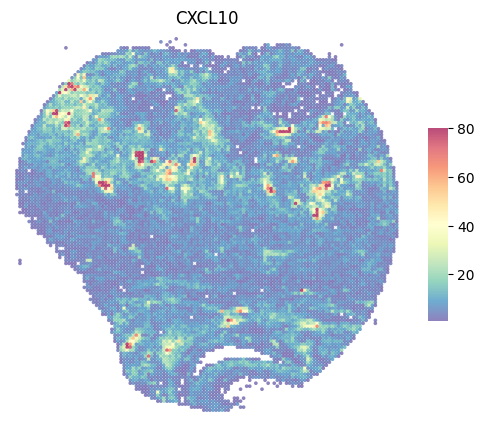

In [680]:
fig, axes = plt.subplots(ncols=1, figsize=(6.35,5))
st.pl.gene_plot(grid, gene_symbols=['CXCL10'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case12_CXCL10.png", dpi=500)

In [685]:
df_grid.columns[df_grid.columns.str.contains("IFN")]

Index(['IFNAR1', 'IFNAR2', 'IFNG', 'IFNGR1', 'IFNGR2', 'IFNLR1'], dtype='object')

In [691]:
adata = sc.read_10x_h5(
    filename="cell_feature_matrix.h5"
)

In [692]:
df = pd.read_csv(
    "cells.csv.gz"
)

In [693]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [694]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [695]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [696]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0012975752833744366
Negative decoding count % : 0.003326822973233137


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

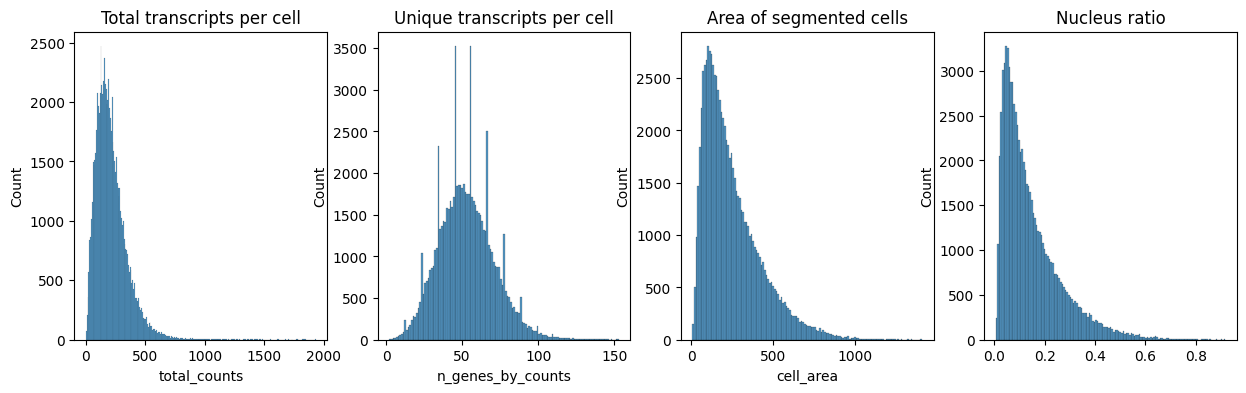

In [697]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [698]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [699]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

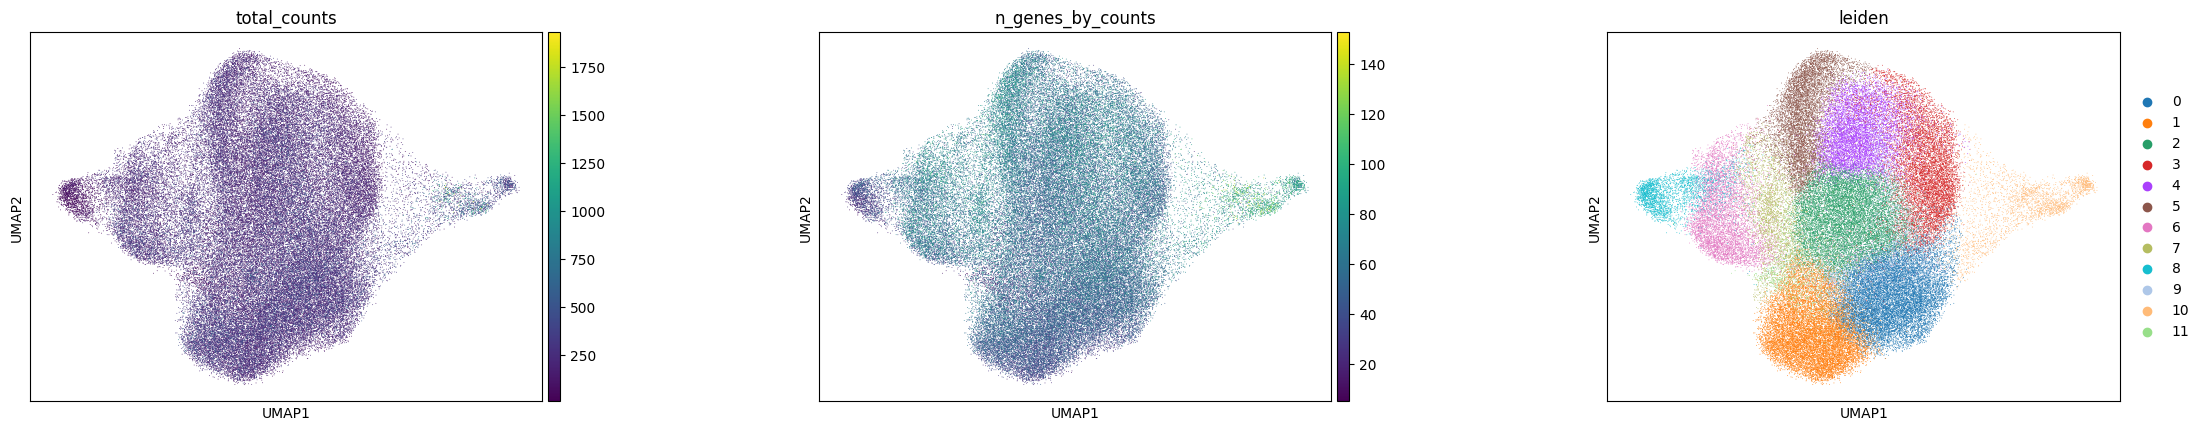

In [704]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

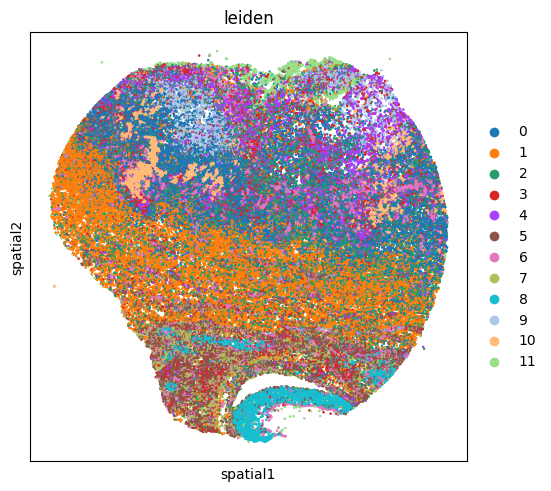

In [706]:
import squidpy as sq
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

In [730]:
adata.uns["cluster"] = adata.obs["leiden"]

In [736]:
st.spatial.clustering.localization(adata, use_label="leiden")

KeyError: "None of [Index(['imagerow', 'imagecol'], dtype='object')] are in the [columns]"

In [731]:
st.pl.subcluster_plot(adata, use_label="cluster", cluster="6")

AssertionError: Please run `stlearn.spatial.cluster.localization` function!

In [708]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [709]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.50/s]


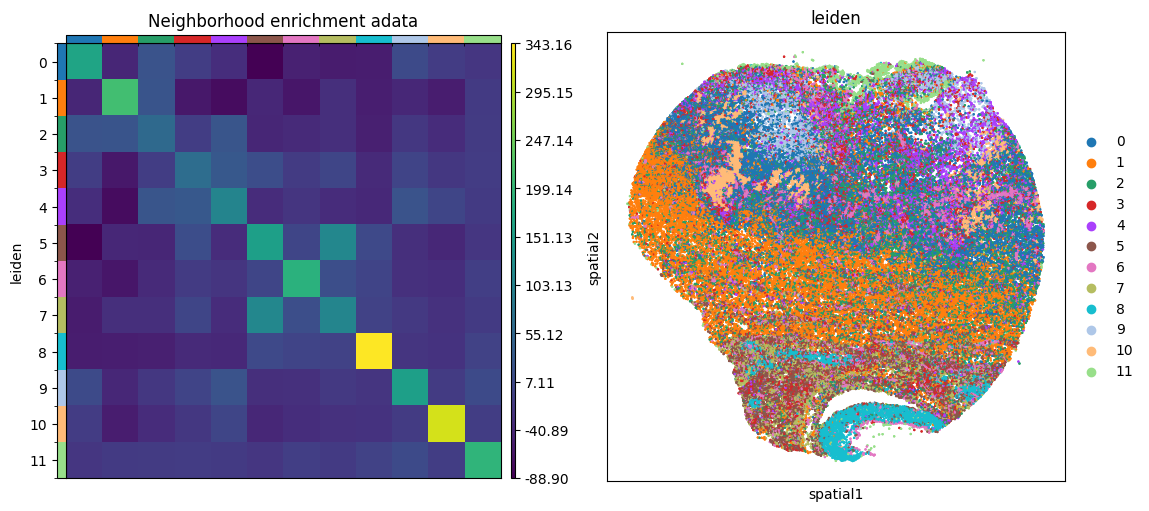

In [711]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata, color="leiden", shape=None, size=2, ax=ax[1])

In [712]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata.uns["moranI"].head(10)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:14<00:00,  4.94s/]


I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
COL1A1  0.689053        0.0  0.000004         0.0  0.009901  0.000007   
EPCAM   0.661908        0.0  0.000004         0.0  0.009901  0.000008   
KRT19   0.659493        0.0  0.000004         0.0  0.009901  0.000008   
CD24    0.638815        0.0  0.000004         0.0  0.009901  0.000007   
CXCL10  0.631050        0.0  0.000004         0.0  0.009901  0.000008   
COL3A1  0.612782        0.0  0.000004         0.0  0.009901  0.000008   
KRT7    0.602047        0.0  0.000004         0.0  0.009901  0.000009   
LUM     0.593323        0.0  0.000004         0.0  0.009901  0.000005   
CXCL9   0.556299        0.0  0.000004         0.0  0.009901  0.000006   
MMP2    0.526424        0.0  0.000004         0.0  0.009901  0.000007   

        pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
COL1A1               0.0                0.0         0.010172  
EPCAM                0.0                0.0         0.010172  
KRT19                0.0                0.0         0.010172  
CD24                 0.0                0.0         0.010172  
CXCL10               0.0                0.0         0.010172  
COL3A1               0.0                0.0         0.010172  
KRT7                 0.0                0.0         0.010172  
LUM                  0.0                0.0         0.010172  
CXCL9                0.0                0.0         0.010172  
MMP2                 0.0                0.0         0.010172

## Case7

In [7]:
cd /Volumes/Project/home/sakai/scRNA/20230518_Xenium/DATA/Xenium_Outputs/20230821__074259__2_019/Xenium_Outputs/output-XETG00053__0006778__15_NSCLC_Case7__20230821__075703


/Volumes/Project/home/sakai/scRNA/20230518_Xenium/DATA/Xenium_Outputs/20230821__074259__2_019/Xenium_Outputs/output-XETG00053__0006778__15_NSCLC_Case7__20230821__075703


In [8]:
adata = st.ReadXenium(feature_cell_matrix_file="cell_feature_matrix.h5",
                     cell_summary_file="cells.csv.gz",
                     library_id="Case7_post",
                     image_path="/Volumes/Project/home/sakai/sample.jpg",
                     scale=1,
                     spot_diameter_fullres=15 # Recommend
                     )

Added tissue image to the object!


PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


2023-10-24 12:20:32.784829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain cluster ...
Louvain cluster is done! The labels are stored in adata.obs['louvain']
125 by 125 has this many spots:
 15625
Gridding...
(10774, 300)


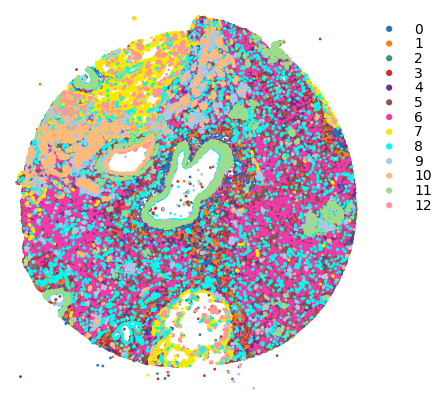

In [9]:
# Filter genes and cells with at least 10 counts
sc.pp.filter_genes(adata, min_counts=10)
sc.pp.filter_cells(adata,min_counts=10)

# Store the raw data for using PSTS
adata.raw = adata

# Normalization data
sc.pp.normalize_total(adata)

# Squareroot normalize transcript counts. We need to deal with sparse matrix of .X
from scipy.sparse import csr_array
adata.X = np.sqrt(adata.X.toarray()) + np.sqrt(adata.X.toarray() + 1)

# Run PCA
st.em.run_pca(adata,n_comps=50,random_state=0)

# Compute neighborhood graph of cells using the PCA representation
st.pp.neighbors(adata,n_neighbors=25,use_rep='X_pca',random_state=0)

st.tl.clustering.louvain(adata,random_state=0)

st.pl.cluster_plot(adata, use_label="louvain", image_alpha=0, size=4, figsize=(5, 5))

### Calculating the number of grid spots we will generate
n_ = 125
print(f'{n_} by {n_} has this many spots:\n', n_*n_)

### Gridding.
grid = st.tl.cci.grid(adata, n_row=n_, n_col=n_, use_label = 'louvain')
print( grid.shape ) # Slightly less than the above calculation, since we filter out spots with 0 cells.

In [10]:
df_grid = grid.to_df()

In [599]:
# output directory
os.mkdir("deg_for_go")
os.mkdir("go_res")

In [624]:
# set background gene
pd.DataFrame(df_grid.columns).to_csv("/Volumes/Project/home/sakai/scRNA/20230518_Xenium/results/background_gene.txt", sep="\t", index=None, header=None)

In [626]:
# threshold top5% of all transcript
top_five_per = pd.DataFrame(df_grid.stack()).reset_index()[0].sort_values(ascending=False).head(int(3232200 * 5/100)).values[-1]


In [627]:
top_five_per

45.360389709472656

In [63]:
df_grid

ACTG2  AGER       APC      ARG1        ATM       ATR  \
grid_53      3.000000   3.0  3.000000  3.000000   6.864661  3.000000   
grid_54      6.392234   2.0  2.000000  2.000000   3.256474  2.000000   
grid_55      6.858188   3.0  3.000000  3.000000   5.540835  4.173963   
grid_56      3.449653   2.0  3.449653  2.000000   3.449653  2.000000   
grid_177     1.852478   1.0  1.000000  1.000000   1.000000  1.852478   
...               ...   ...       ...       ...        ...       ...   
grid_15568  10.207476   6.0  6.000000  6.000000  11.527872  8.049164   
grid_15569  13.758437   6.0  7.225541  6.000000  14.724833  7.487551   
grid_15570   6.160382   3.0  3.000000  3.000000   4.633370  3.000000   
grid_15571   3.474628   2.0  2.000000  2.762723   5.032046  2.968575   
grid_15572   4.155794   3.0  3.000000  3.000000   5.239221  3.000000   

                  B2M       BAX      BCL6      BRAF  ...      TP63      TP73  \
grid_53     30.776606  3.000000  4.410417  4.410417  ...  3.000000  4.410417   
grid_54     20.760929  2.828959  2.000000  2.000000  ...  2.828959  2.000000   
grid_55     35.305367  4.173963  3.000000  5.642306  ...  3.000000  4.173963   
grid_56     19.754196  3.449653  3.449653  2.000000  ...  2.000000  2.000000   
grid_177     7.892506  2.292573  2.650834  1.000000  ...  1.000000  1.000000   
...               ...       ...       ...       ...  ...       ...       ...   
grid_15568  54.693695  6.000000  9.224712  9.020715  ...  6.000000  6.000000   
grid_15569  52.755585  7.236068  8.351279  8.597031  ...  6.000000  6.000000   
grid_15570  26.597591  4.879598  4.633370  4.698373  ...  3.000000  3.000000   
grid_15571  13.894276  2.000000  2.000000  5.224339  ...  3.154683  2.000000   
grid_15572  22.737297  3.000000  5.445377  3.000000  ...  3.000000  3.000000   

               TRAF6      TTF1     VCAM1      VEGFA      VEGFB      VIL1  \
grid_53     3.000000  3.000000  4.205188   7.567400   6.170339  3.000000   
grid_54     2.000000  2.000000  2.828959   2.000000   5.191907  2.000000   
grid_55     3.000000  4.366873  3.000000   3.000000   5.540835  6.676043   
grid_56     2.000000  2.000000  2.000000   3.449653   6.712048  2.000000   
grid_177    1.000000  1.000000  2.292573   2.650834   2.292573  1.852478   
...              ...       ...       ...        ...        ...       ...   
grid_15568  6.000000  7.274905  8.639168   7.745810  11.876135  6.000000   
grid_15569  7.320342  7.109479  7.861420  10.036530  13.696422  6.000000   
grid_15570  3.000000  3.000000  6.157057   3.000000   8.661200  3.000000   
grid_15571  3.154683  2.762723  2.968575   4.005736   4.974311  2.762723   
grid_15572  3.000000  3.000000  4.155794   6.713956   7.041859  3.000000   

                 VWF  WT1  
grid_53     3.000000  3.0  
grid_54     2.000000  2.0  
grid_55     3.000000  3.0  
grid_56     2.000000  2.0  
grid_177    1.000000  1.0  
...              ...  ...  
grid_15568  6.000000  6.0  
grid_15569  8.351279  6.0  
grid_15570  3.000000  3.0  
grid_15571  2.762723  2.0  
grid_15572  3.000000  3.0  

[10774 rows x 300 columns]

In [628]:
# threshold top5% of all transcript
top_five_per = pd.DataFrame(df_grid.stack()).reset_index()[0].sort_values(ascending=False).head(int(3232200 * 5/100)).values[-1]

t1 = time.time()

for i in df_grid.index:
    # significant gene
    sig_gene_list = df_grid[df_grid >= top_five_per].loc[i].dropna().index.tolist()


    if len(gene_list) == 0:
        continue

    else:
        sig_gene_list = ";".join(sig_gene_list)
        # run
        subprocess.Popen([
            "python", 
            os.path.join("/Volumes/Project/home/sakai/scRNA/scripts", "20230920_xenium_to_go.py"), 
            sig_gene_list, 
            i
        ])

        # 0.5秒まつ
        time.sleep(0.5)
        
t2 = time.time()
print(t2-t1)

2023-09-21 21:25:34,619 [ERROR] Error fetching enrichment results: GO_Biological_Process_2021
Traceback (most recent call last):
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/site-packages/requests/models.py", line 971, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/sakai/miniconda3/envs/xenium/lib/python3.8/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Volumes/Project/home/sakai/scRNA/scripts/20230920_xenium_to_go.py", lin

6286.841944932938


In [4]:
import os

In [11]:
# rerun failed analysis due to API limitation
# successed grid
res_ls = os.listdir("go_res/")
res_grid_ls = [i.split(".txt")[0] for i in res_ls]

# all - successed
remain_grid = list(set(df_grid.index) - set(res_grid_ls))


In [631]:
# rerun
top_five_per = pd.DataFrame(df_grid.stack()).reset_index()[0].sort_values(ascending=False).head(int(3394800 * 5/100)).values[-1]

t1 = time.time()

for i in remain_grid:
    # significant gene
    sig_gene_list = df_grid[df_grid >= top_five_per].loc[i].dropna().index.tolist()

    sig_gene_list = ";".join(sig_gene_list)
    # run
    subprocess.Popen([
        "python", 
        os.path.join("/Volumes/Project/home/sakai/scRNA/scripts", "20230920_xenium_to_go.py"), 
        sig_gene_list, 
        i
    ])

    # 0.5秒まつ
    time.sleep(0.5)
    
t2 = time.time()
print(t2-t1)

163.856121301651


In [15]:
# get results
res_ls = os.listdir("go_res/")
res_grid_ls = [i.split(".txt")[0] for i in res_ls]

# results to dataframe
flag = 0

for i in res_grid_ls:
    df_temp = pd.read_table(f"go_res/{i}.txt").set_index("Term")[["P-value"]].rename(columns={"P-value": i}).T

    if flag == 0:
        df_res = df_temp
        flag += 1

    else:
        df_res = pd.concat([df_res, df_temp])
        
# save
df_res.to_csv("go_grid_p_res.txt", sep="\t")

def calculate_q(p_seq):
    p_arr   = np.asarray(p_seq)
    N       = len(p_arr)
    idx_arr = np.argsort(p_arr)
    q_arr   = p_arr[idx_arr] * N / (np.arange(N) + 1)
    q_arr   = np.minimum.accumulate(q_arr[::-1])[::-1]
    q_arr[idx_arr] = q_arr.copy()
    return q_arr
    
# calculate q value
res_q = calculate_q(df_res.stack().dropna().values)

# stack form
df_temp_res = pd.DataFrame(df_res.stack().dropna())

# insert q value
df_temp_res["q_val"] = res_q

# delete p value
df_temp_res = df_temp_res.drop(0, axis=1)

# unstack
df_res_q = df_temp_res.unstack()

# shaping
df_res_q = df_res_q.T.reset_index().drop("level_0", axis=1).set_index("Term").T

df_res_q = pd.merge(df_grid[[]], df_res_q, right_index=True, left_index=True, how="left")

# save
df_res_q.to_csv("go_grid_q_res.txt", sep="\t")

# log transformation and fill nan value to zero
df_res_q_log = df_res_q.applymap(lambda x: np.log10(x) * -1).fillna(0)

Unnamed: 0  supramolecular fiber organization (GO:0097435)  \
0         grid_53                                             NaN   
1         grid_54                                             NaN   
2         grid_55                                             NaN   
3         grid_56                                             NaN   
4        grid_177                                             NaN   
...           ...                                             ...   
10769  grid_15568                                        0.001976   
10770  grid_15569                                        0.000056   
10771  grid_15570                                             NaN   
10772  grid_15571                                             NaN   
10773  grid_15572                                             NaN   

       antigen processing and presentation of exogenous peptide antigen via MHC class I (GO:0042590)  \
0                                                    NaN                                               
1                                                    NaN                                               
2                                                    NaN                                               
3                                                    NaN                                               
4                                                    NaN                                               
...                                                  ...                                               
10769                                           0.059118                                               
10770                                           0.321201                                               
10771                                                NaN                                               
10772                                                NaN                                               
10773                                                NaN                                               

       antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-dependent (GO:0002479)  \
0                                                    NaN                                                              
1                                                    NaN                                                              
2                                                    NaN                                                              
3                                                    NaN                                                              
4                                                    NaN                                                              
...                                                  ...                                                              
10769                                           0.059118                                                              
10770                                           0.321201                                                              
10771                                                NaN                                                              
10772                                                NaN                                                              
10773                                                NaN                                                              

       antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-independent (GO:0002480)  \
0                                                    NaN                                                                
1                                                    NaN                                                                
2                                                    NaN                                                                
3               

In [16]:
df_res_q = pd.read_table("go_grid_q_res.txt", index_col=0)
# log transformation and fill nan value to zero
df_res_q_log = df_res_q.applymap(lambda x: np.log10(x) * -1).fillna(0)

In [20]:
import scipy.stats as stat

In [21]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL13.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
antigen processing and presentation of exogenou...                         0.774244
antigen processing and presentation of exogenou...                         0.774244
antigen processing and presentation of exogenou...                         0.774244
antigen processing and presentation of peptide ...                         0.774244
antigen processing and presentation of endogeno...                         0.750369
interferon-gamma-mediated signaling pathway (GO...                         0.739727
antigen processing and presentation of endogeno...                         0.735454
antigen processing and presentation of endogeno...                         0.735454
neutrophil degranulation (GO:0043312)                                      0.726275
neutrophil activation involved in immune respon...                         0.726275

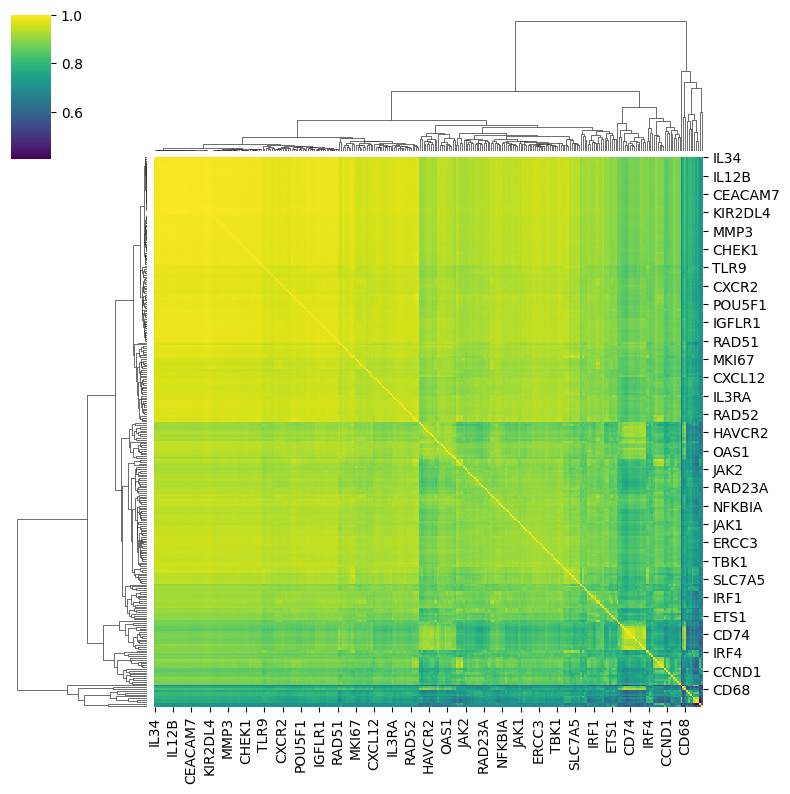

In [59]:
sns.clustermap(
    df_grid.corr(method="spearman"), cmap="viridis", figsize=(8, 8)
)

In [ ]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL13.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

In [80]:
stat.pearsonr(df_grid.CXCL13.apply(lambda x: np.log10(x)), df_res_q_log["interferon-gamma-mediated signaling pathway (GO:0060333)"]).statistic.round(3)

0.74

In [72]:
stat.pearsonr(df_grid.CXCL9.apply(lambda x: np.log10(x)), df_res_q_log["interferon-gamma-mediated signaling pathway (GO:0060333)"]).statistic.round(3)

0.737

In [73]:
stat.pearsonr(df_grid.CXCL10.apply(lambda x: np.log10(x)), df_res_q_log["interferon-gamma-mediated signaling pathway (GO:0060333)"]).statistic.round(3)

0.717

In [636]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.TGFB1.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
antigen processing and presentation of exogenou...                         0.748671
antigen processing and presentation of exogenou...                         0.748671
antigen processing and presentation of peptide ...                         0.748671
antigen processing and presentation of exogenou...                         0.748671
antigen processing and presentation of endogeno...                         0.726284
interferon-gamma-mediated signaling pathway (GO...                         0.708312
antigen processing and presentation of endogeno...                         0.704161
antigen processing and presentation of endogeno...                         0.704161
cytokine-mediated signaling pathway (GO:0019221)                           0.699784
neutrophil degranulation (GO:0043312)                                      0.694182

In [654]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL9.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
interferon-gamma-mediated signaling pathway (GO...                         0.737402
cellular response to interferon-gamma (GO:0071346)                         0.727980
antigen processing and presentation of endogeno...                         0.727391
antigen processing and presentation of exogenou...                         0.723152
antigen processing and presentation of exogenou...                         0.723152
antigen processing and presentation of peptide ...                         0.723152
antigen processing and presentation of exogenou...                         0.723152
cytokine-mediated signaling pathway (GO:0019221)                           0.719162
neutrophil degranulation (GO:0043312)                                      0.697569
neutrophil activation involved in immune respon...                         0.697569

In [647]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.EPCAM.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
antigen processing and presentation of exogenou...                         0.683842
antigen processing and presentation of exogenou...                         0.683842
antigen processing and presentation of exogenou...                         0.683842
antigen processing and presentation of peptide ...                         0.683842
antigen processing and presentation of endogeno...                         0.671823
interferon-gamma-mediated signaling pathway (GO...                         0.666005
neutrophil degranulation (GO:0043312)                                      0.665178
neutrophil activation involved in immune respon...                         0.665178
regulation of cytokine-mediated signaling pathw...                         0.657724
neutrophil mediated immunity (GO:0002446)                                  0.657166

In [661]:
res_ls = []
for i in df_res_q_log.columns:
    res_ls += [stat.pearsonr(df_grid.CXCL16.apply(lambda x: np.log10(x)), df_res_q_log[i]).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_res_q_log.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
antigen processing and presentation of endogeno...                         0.767285
interferon-gamma-mediated signaling pathway (GO...                         0.755543
antigen processing and presentation of exogenou...                         0.742440
antigen processing and presentation of exogenou...                         0.742440
antigen processing and presentation of exogenou...                         0.742440
antigen processing and presentation of peptide ...                         0.742440
cellular response to interferon-gamma (GO:0071346)                         0.730858
regulation of interferon-gamma production (GO:0...                         0.725792
regulation of T cell mediated cytotoxicity (GO:...                         0.722276
cytokine-mediated signaling pathway (GO:0019221)                           0.719974

In [674]:
res_ls = []
for i in df_grid.columns:
    res_ls += [stat.pearsonr(df_grid.IL1B.apply(lambda x: np.log10(x)), df_grid[i].apply(lambda x: np.log10(x))).statistic]

df_corr_res = pd.DataFrame(res_ls, index=df_grid.columns, columns=["Pearson correlation coefficient"])

df_corr_res.sort_values("Pearson correlation coefficient", ascending=False).dropna().head(10)

Pearson correlation coefficient
IL1B                             1.000000
KIR2DL4                          0.998381
GPA33                            0.998291
WT1                              0.998279
SLC26A3                          0.997736
IL12B                            0.997538
TP53AIP1                         0.997507
IRF7                             0.997441
IL17A                            0.997259
TNFRSF18                         0.997217

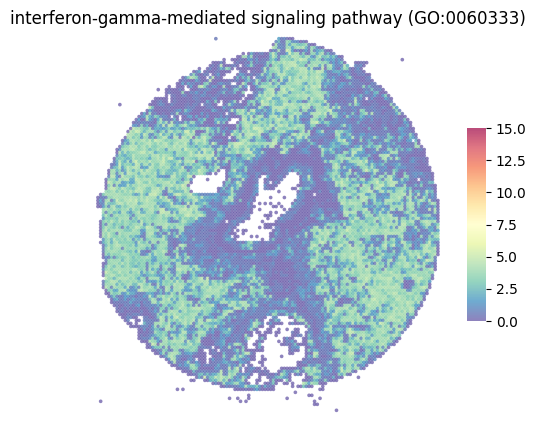

In [649]:
df_ifng = df_res_q[['interferon-gamma-mediated signaling pathway (GO:0060333)']].apply(lambda x: np.log10(x) * -1).fillna(0)

df_ifng = df_ifng.loc[grid.obs.index]

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))

grid.obs['interferon-gamma-mediated signaling pathway (GO:0060333)'] = df_ifng['interferon-gamma-mediated signaling pathway (GO:0060333)'].values
st.pl.feat_plot(grid, feature='interferon-gamma-mediated signaling pathway (GO:0060333)', ax=axes, show_plot=False, vmax=15, show_color_bar=True, show_image=False)

plt.savefig("Case7_IFNG_pathway.png", dpi=500)

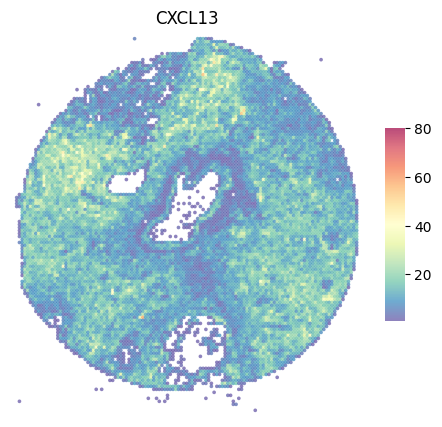

In [658]:
fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols='CXCL13', ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_CXCL13.png", dpi=500)

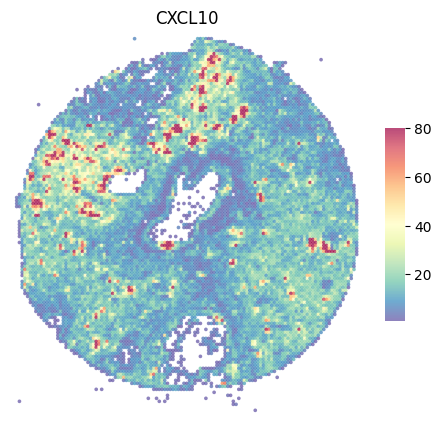

In [659]:
fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols='CXCL10', ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_CXCL10.png", dpi=500)

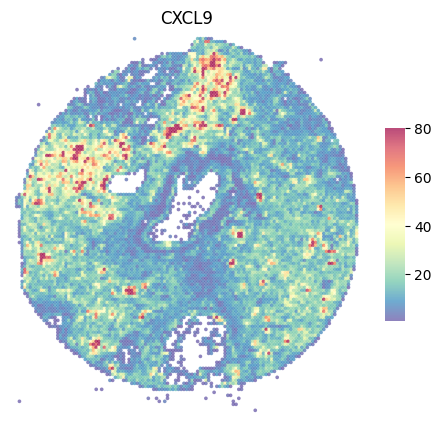

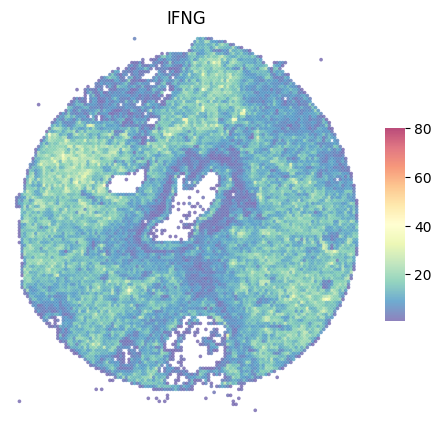

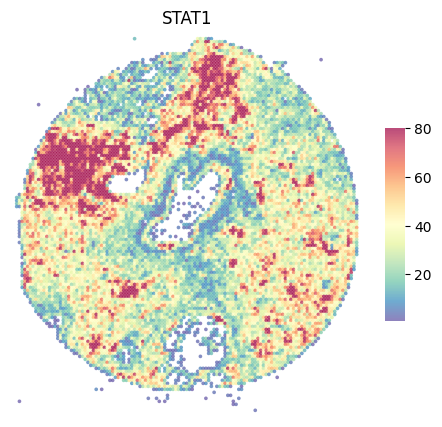

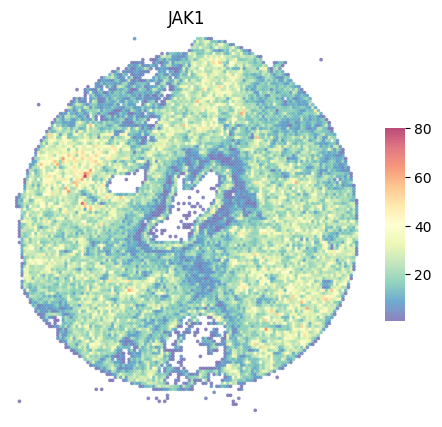

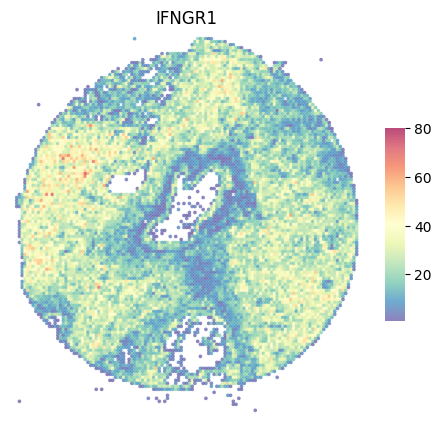

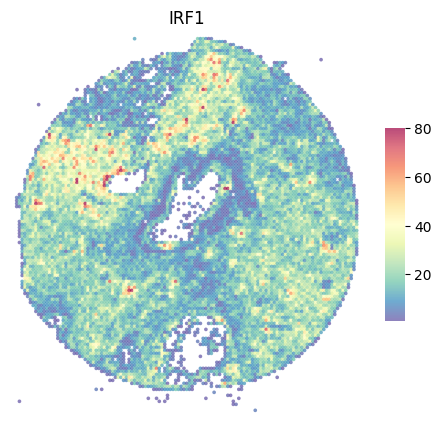

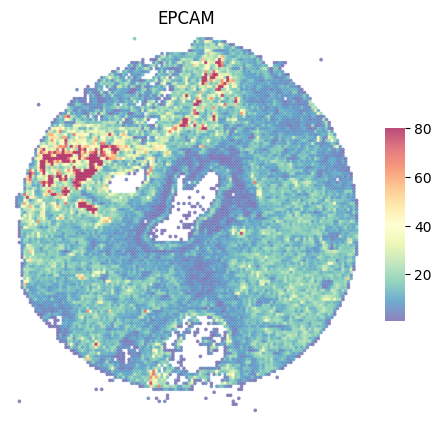

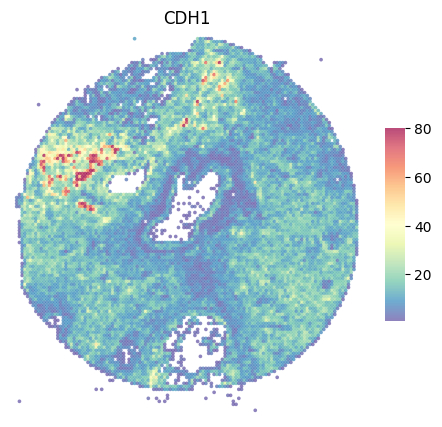

In [643]:
fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols='CXCL9', ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_CXCL9.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['IFNG'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_IFNG.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['STAT1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_STAT1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['JAK1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_JAK1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['IFNGR1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_IFNGR1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['IRF1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_IRF1.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['EPCAM'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_EPCAM.png", dpi=500)

fig, axes = plt.subplots(ncols=1, figsize=(5.7,5))
st.pl.gene_plot(grid, gene_symbols=['CDH1'], ax=axes, show_color_bar=True, show_plot=False,vmax=80, show_image=False)

plt.savefig("Case7_CDH1.png", dpi=500)